First: importing necessary packages for analysis, visualisation and model building

In [803]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

Getting a feel for the dataset

In [718]:
#Loading the CSV file into a pandas DataFrame
date = pd.read_csv('profiles.csv')

Getting a feel for the data: column names, shape of the dataframe, head of the dataset, info and describe.

In [719]:
print(date.columns)
print(date.shape)

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
(59946, 31)


Looks like there are 31 columns including 10 essays, age, lifestyle factors, social variables and measure of activity on OK-Cupid.

In [720]:
date.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [721]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [722]:
date.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


First, let's check the disribution of males vs females, and age in this dataset to see if the gender and age distributions are representative of the wider US population.

['m' 'f']
[35829 24117]


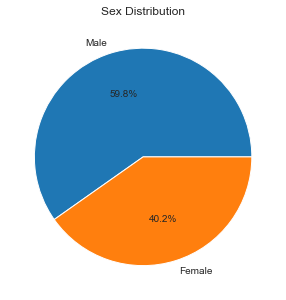

In [723]:
print(date.sex.unique())
print(date.sex.value_counts().values)

#sex = date.sex.value_counts()
#sex.plot(kind='pie', title='Sex Distribution', figsize=(5, 5), autopct='%1.1f%%', labels=['Male', 'Female'])
#plt.show()

sex_values = date.sex.value_counts().values

plt.figure(figsize=(5, 5))

plt.pie(sex_values, autopct='%1.1f%%', labels=['Male', 'Female'])
plt.title('Sex Distribution')
plt.show()

We can see here that the sex distribution is not representitative of the US population. More males than females use OK Cupid. (59.8% to 40.2%)

In [724]:
print(date.age.max())
# Here we can see that the oldest registered age was 110 - good on this person for getting back in the game! But it is most likely an error, so we will remove it.

110


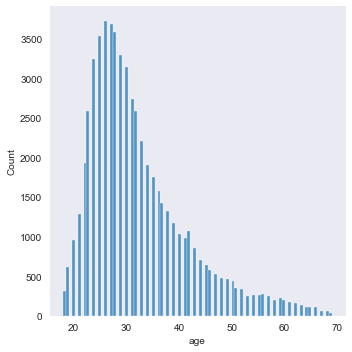

Age skewness: 1.2525938507264769
Max age: 69.0
Mean age: 32.33771520085413
Median age: 30.0


In [725]:
date.age = date[date.age <= 100]

sns.displot(date.age)
plt.show()

print('Age skewness: ' + str(date.age.skew()))

print('Max age: ' + str(date.age.max()))
# Now we have a far more reasonable range of ages within which to do analysis.

print('Mean age: ' + str(date.age.mean()))
print('Median age: '+ str(date.age.median()))

From this distribution, we can see that the largest age group of people that use OK Cupid are in the age range of 25-35. The distribution is skewed right, showing that most people that use an online dating website are younger. This is as expected. To make age data more suitable for ML analysis, we can use a log transformation on this data.

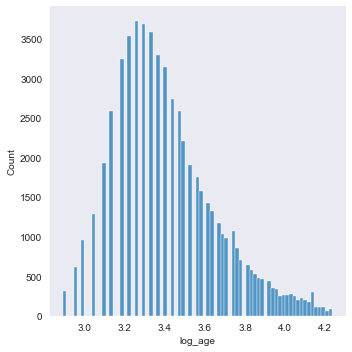

In [726]:
date_age = date['age']

date['log_age'] = date.age.apply(lambda x: np.log(x))

sns.displot(date.log_age)
plt.show()

date.log_age = date.log_age.fillna(date.log_age.mean())

Ah yes, wonderful! Now we have a more normalised age range, far better suited to ML analysis.
Next to check is income. I will repeat a similar analysis process as done to the age category in order to get a better idea of what this column contains. From the preliminary glimpse it looks like a strange column. Describe inicates that a lot of the data is gathered around -1.000 with an outlier of 100000. Let's see what is going on here.

<Figure size 360x576 with 0 Axes>

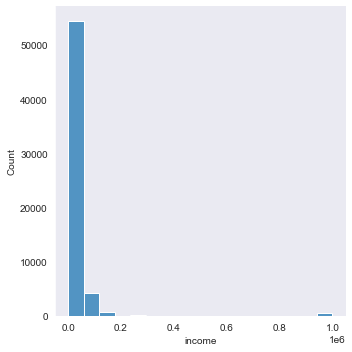

-1


In [727]:
plt.figure(figsize=(5, 8))
sns.displot(date.income)
plt.show()
# Not the expected distribution!

print(date.income.min())
# It is not possible to have an income of -1, so there is clearly an error in the data here. Any values of -1 will be mapped to 0.

In [728]:
print(date.income.value_counts())

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64


0
1000000
0          48442
20000       2952
100000      1621
80000       1111
30000       1048
40000       1005
50000        975
60000        736
70000        707
150000       631
1000000      521
250000       149
500000        48
Name: income, dtype: int64
0.8080939512227672


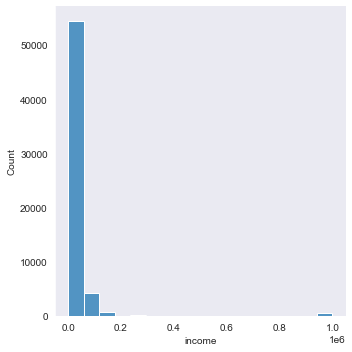

In [729]:
date.income = date.income.apply(lambda x: 0 if x < 0 else x)
sns.displot(date.income)

print(date.income.min())
# Better!
print(date.income.max())

print(date.income.value_counts())

print(48442/len(date.income))

The minimum income is 0 and the maximum is 1,000,000. The fact that most people put their income as -1 indicates that they do not wish to disclose their income to potential partners. This could indicate that people do not want money to be a factor when it comes to finding the best romantic partner for them. 80.8% of people chose this option, so income is not a useful variable because of its unimportance in the context of this dating website.

Because we are interested in factors that are able to predict to star sign, it will be useful to see the proportion of people that list their star sign, the proportion of people that list it as an important factor in a potential partner, and the distribtion of people of various star signs in the dataset.

In [730]:
print(date.sign.value_counts())
print(date.sign.isnull().sum())
print(len(date.sign))
print(11056/59946)

gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
aquarius but it doesn&rsquo;t matter             1408
libra but it doesn&rsquo;t matter                1408
capricorn and it&rsquo;s fun

We can see here that over 80% of users listed their star sign. Given the large majority of users that entered this information, we can use other factors to predict the star sign of users in this sample. Lets continue, and see the proportion of people that list their star sign as very important, and visualise the distribution of different star signs in this sample.

In [731]:
# Function to determine how many users listed star sign as very important in a partner.
def sign_important(x):
    matters = 'it matters a lot' in x
    if matters == True:
        return 1
    else:
        return 0

date['sign_important'] = date.sign.apply(lambda x: sign_important(str(x)))
print(date.sign_important.value_counts())

# Here I can see that there is a very small proportion of respondents to whom star sign is very important.

print(675/(59946-11056))

# Just 1.4% of users listed star sign as being very important, so trying to predict whether they rated it as important
# or not will be difficult because the model would have to be highly accurate to predict such a small percentage.
# Instead, it seems more likely that a model would have a better accuracy predicting which star sign users are.

0    59271
1      675
Name: sign_important, dtype: int64
0.013806504397627326


In [732]:
# Creating a column of cleaned sign values, without the level of it mattering in order to predict star sign

date['sign_clean'] = date.sign.apply(lambda x: (str(x).split(' '))[0])
date.sign_clean.replace('nan', np.NaN, inplace = True)
print(date.sign_clean.value_counts())

leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: sign_clean, dtype: int64


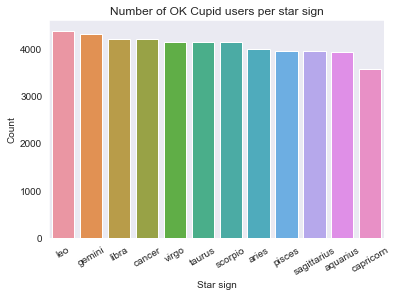

In [733]:
sign_counts = date.sign_clean.value_counts()

ax = plt.subplot
sns.barplot(x=sign_counts.index, y=sign_counts.values)
plt.xticks(rotation=30)
plt.xlabel('Star sign')
plt.ylabel('Count')
plt.title('Number of OK Cupid users per star sign')
plt.show()

Pretty even distribution of star signs in this dataset. 

PROJECT SCOPE

What other factors am I interested in using when trying to predict a users star sign?
Education could be interesting. Does education level predict star sign?
Lifestyle choice could be interesting too. Different star signs are well known for their various traits and behaviours. Could these lifestyle choices predict which star sign a user is? Could religion be predictive of star sign? Are certain star signs more likely to be religious than others?
For these multiple lifestyle factors, K nearest neighbors or random forest could be good predictive models.

Another interesting one would be users' responses to the essay questions, and the lanuage that they use. Do different star signs use specific or identifying language in their responses?
Naive Bayes classifier would be good for this.

In [734]:
# Lets start with education

print(date.education.value_counts())

graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
dropped out

In [735]:
# Mapping education to numeric values (ordinal values). 0 - less than a college degree, 1 - a college degree, 2 - greater than a college degree

education_map = {'dropped out of high school': 0,
             'working on high school' : 0, 
             'high school': 0, 
             'graduated from high school': 0, 
             'dropped out of two-year college': 0,
             'dropped out of space camp': 0,
             'working on two-year college': 0,
             'working on space camp': 0,
             'space camp': 0,
             'two-year college': 0,
             'graduated from space camp': 0,
             'graduated from two-year college': 0,
             'dropped out of college/university': 0,
             'working on college/university': 1,
             'college/university': 1,
             'graduated from college/university': 1,
             'dropped out of masters program': 1,
             'working on masters program': 2,
             'masters program': 2,
             'graduated from masters program': 2,
             'dropped out of law school': 1,
             'working on law school': 2,
             'law school': 2,
             'graduated from law school': 2,
             'dropped out of med school': 1,
             'working on med school': 2,
             'med school': 2,
             'graduated from med school': 2,
             'dropped out of ph.d program': 2,
             'working on ph.d program': 2,
             'ph.d program': 2,
             'graduated from ph.d program': 2}

date['education_int'] = date.education.map(education_map).replace(np.nan, 0)
print(date.education_int.unique())

# Would prefer this to be an integer rather than a float
#print(date.dtypes)
date.education_int = date.education_int.astype(int)
print(date.education_int.unique())
#print(date.dtypes)

[1. 0. 2.]
[1 0 2]


education_int is now ready to use for analysis, it will just need to be scaled.

In [736]:
print(date.religion.value_counts())

agnosticism                                   2724
other                                         2691
agnosticism but not too serious about it      2636
agnosticism and laughing about it             2496
catholicism but not too serious about it      2318
atheism                                       2175
other and laughing about it                   2119
atheism and laughing about it                 2074
christianity                                  1957
christianity but not too serious about it     1952
other but not too serious about it            1554
judaism but not too serious about it          1517
atheism but not too serious about it          1318
catholicism                                   1064
christianity and somewhat serious about it     927
atheism and somewhat serious about it          848
other and somewhat serious about it            846
catholicism and laughing about it              726
judaism and laughing about it                  681
buddhism but not too serious ab

Time to clean up the religion column. This will be grouped into people who identify as religious, versus those who do not. For this analysis, 'other' will be classified as not, as will agnosticism.

In [737]:
date['religion_clean'] = date.religion.apply(lambda x: (str(x).split(' '))[0])
date.religion_clean.replace('nan', np.NaN, inplace = True)
date.religion_clean = date.religion_clean.apply(lambda x: 'not religious' if pd.isnull(x) else x)
print(date.religion_clean.value_counts())
date['religion_int'] = date.religion_clean.map({'not religious': 0, 'agnosticism': 0, 'atheism': 0, 'other': 0, 'christianity': 1, 'catholicism': 1, 'judaism': 1, 'buddhism': 1, 'hinduism': 1, 'islam': 1})
print(date.religion_int.unique())

not religious    20226
agnosticism       8812
other             7743
atheism           6985
christianity      5787
catholicism       4758
judaism           3098
buddhism          1948
hinduism           450
islam              139
Name: religion_clean, dtype: int64
[0 1]


Now for lifestyle choices and factors. Mapping them to numeric ordinal values

In [738]:
# Smoking
print(date.smokes.unique())
date['smoker_int'] = date.smokes.map({'no': 0, 'sometimes': 1, 'when drinking': 1, 'yes': 2, 'trying to quit': 2}).replace(np.nan, 0)
date.smoker_int = date.smoker_int.astype(int)
print(date.smoker_int.unique())

['sometimes' 'no' nan 'when drinking' 'yes' 'trying to quit']
[1 0 2]


In [739]:
# Drinking
print(date.drinks.unique())
date['drinks_int'] = date.drinks.map({'not at all': 0, 'rarely': 1, 'socially': 2, 'often': 3, 'very often': 4, 'desperately': 5}).replace(np.nan, 0)
date.drinks_int = date.drinks_int.astype(int)
print(date.drinks_int.unique())

['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperately']
[2 3 0 1 4 5]


In [740]:
# Drug use
print(date.drugs.unique())
date['drugs_int'] = date.drugs.map({'never': 0, 'sometimes': 1, 'often': 2}).replace(np.nan, 0)
date.drugs_int = date.drugs_int.astype(int)
print(date.drugs_int.unique())

['never' 'sometimes' nan 'often']
[0 1 2]


Now for nominal categorical columns

In [741]:
# Diet - this will be One-Hot Encoded.
print(date.diet.unique())

# First, sort the various diets
date['diet_clean'] = date.diet.apply(lambda x: str(x).split(' ')[-1])
# Given the large number of respondents who didn't list their diet, they will be reclassified as 'anything'
date.diet_clean.replace('nan', np.NaN, inplace = True)
date.diet_clean = date.diet_clean.apply(lambda x: 'anything' if pd.isnull(x) else x)
print(date.diet_clean.value_counts())

['strictly anything' 'mostly other' 'anything' 'vegetarian' nan
 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']
anything      52276
vegetarian     4986
other          1790
vegan           702
kosher          115
halal            77
Name: diet_clean, dtype: int64


In [742]:
# Now to OHE the diet_clean column

date = pd.get_dummies(data=date, columns=['diet_clean'])
print(date.head())
# Looks great!

    age       body_type               diet    drinks      drugs  \
0  22.0  a little extra  strictly anything  socially      never   
1  35.0         average       mostly other     often  sometimes   
2  38.0            thin           anything  socially        NaN   
3  23.0            thin         vegetarian  socially        NaN   
4  29.0        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                   

In [743]:
# Orientation column will also be OHE
print(date.orientation.unique())

date = pd.get_dummies(data=date, columns=['orientation'])
print(date.head())

['straight' 'bisexual' 'gay']
    age       body_type               diet    drinks      drugs  \
0  22.0  a little extra  strictly anything  socially      never   
1  35.0         average       mostly other     often  sometimes   
2  38.0            thin           anything  socially        NaN   
3  23.0            thin         vegetarian  socially        NaN   
4  29.0        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the 

That looks like all of our columns are now prepared for analysis. Now, to create a subset of data and labels to train our model on, and see how accurate it is!

In [744]:
# Labels subset
#print(date.sign_clean.unique())
# Looks like there are some nan values (identified in our EDA earlier). For the purposes of this project, all users with np.nan star sign columns will be dropped
date = date.dropna(subset = ['sign_clean']).reset_index()
#print(date.sign_clean.unique())

date['sign_int'] = date.sign_clean.map({'leo': 0, 'gemini': 1, 'libra': 2, 'cancer':3, 'virgo': 4, 'taurus': 5, 'scorpio': 6, 'aries': 7, 'pisces': 8, 'sagittarius': 9, 'aquarius': 10, 'capricorn': 11})

labels = date[['sign_int']]
#print(labels)
#print(type(labels))
labels_series = labels.squeeze()
#print(labels_series)
labels_final = labels_series.ravel()
print(labels_final)
# We have our labels for our model!

[1 3 8 ... 9 0 1]


In [745]:
# Data subset
print(date.columns)
data = date[['log_age', 'education_int', 'religion_int', 'smoker_int', 'drinks_int', 
             'drugs_int', 'diet_clean_anything', 'diet_clean_halal', 'diet_clean_kosher', 'diet_clean_other',
             'diet_clean_vegan', 'diet_clean_vegetarian', 'orientation_bisexual',
             'orientation_gay', 'orientation_straight']]
print(data.head())

print(data.isnull().sum())

Index(['index', 'age', 'body_type', 'diet', 'drinks', 'drugs', 'education',
       'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6',
       'essay7', 'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sex',
       'sign', 'smokes', 'speaks', 'status', 'log_age', 'sign_important',
       'sign_clean', 'education_int', 'religion_clean', 'religion_int',
       'smoker_int', 'drinks_int', 'drugs_int', 'diet_clean_anything',
       'diet_clean_halal', 'diet_clean_kosher', 'diet_clean_other',
       'diet_clean_vegan', 'diet_clean_vegetarian', 'orientation_bisexual',
       'orientation_gay', 'orientation_straight', 'sign_int'],
      dtype='object')
    log_age  education_int  religion_int  smoker_int  drinks_int  drugs_int  \
0  3.091042              1             0           1           2          0   
1  3.555348              0             0           0           3          1   
2  3.637586  

In [746]:
# Just to make sure they are the same length
print(len(data), len(labels))
#print(data.iloc[0:3])

48890 48890


In [747]:
# Now to scale the data and standardise it for model building
scaled_data = scale(data)
print(scaled_data[0])

[-1.30768965 -0.02540929 -0.64522976  1.28242989  0.20851995 -0.40381621
  0.39356192 -0.03620466 -0.04342031 -0.18388021 -0.11146718 -0.30664265
 -0.22556166 -0.33650607  0.42030303]


In [748]:
# Splitting the scaled data into a testing and training set.
train_data, test_data, train_labels, test_labels = train_test_split(scaled_data, labels_final, test_size=0.2, random_state = 1) 

In [749]:
# First, lets try a K Nearest Neighbors model. I will start with 12 neighbors, because that is the number of star signs.
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(train_data, train_labels)

KNeighborsClassifier()

In [752]:
# Lets see how accurate our model is..
print(classifier.score(test_data, test_labels))
guesses = classifier.predict(test_data)

0.08191859275925548


In [760]:
print(accuracy_score(test_labels, guesses))
print(recall_score(test_labels, guesses, average='weighted'))
print(precision_score(test_labels, guesses, average='weighted'))
print(f1_score(test_labels, guesses, average='weighted'))

0.08191859275925548
0.08191859275925548
0.08040413629351419
0.07293636084995476


Not very accurate! Let's now try to visualise how accurate our model is with different n_neighbors

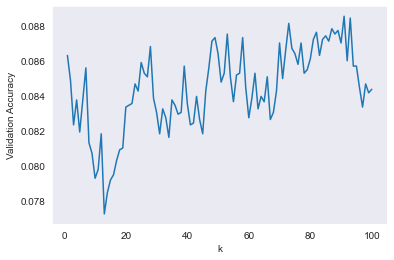

In [498]:
accuracies = []
for k in range(1, 101):
    classifier = KNeighborsClassifier(n_neighbors= k)
    classifier.fit(train_data, train_labels)
    accuracies.append(classifier.score(test_data, test_labels))
    
k_list=range(1, 101)
plt.plot(k_list, accuracies)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.show()

We can see that classifying star signs using the chosen lifestyle factors is not very accurate, less than 9% accurate with the optimal k (which is very high, and so not an ideal model to use due to overfitting). Let's try instead a random forest model and see if that improves performance at all...

In [761]:
# Now, lets work on modelling the same dataset using a random forest method. This will allow us to see which factors have the biggest impact on modelling performance.

forest = RandomForestClassifier(random_state=1)
forest.fit(train_data, train_labels)
print(forest.score(test_data, test_labels))
print(forest.feature_importances_)

0.08457762323583555
[0.63722441 0.0659251  0.02749303 0.05403059 0.11588973 0.04533265
 0.00877115 0.00159122 0.00173956 0.00538676 0.00479564 0.00806117
 0.00740147 0.00751294 0.0088446 ]


In [762]:
guesses = forest.predict(test_data)
print(accuracy_score(test_labels, guesses))
print(recall_score(test_labels, guesses, average='weighted'))
print(precision_score(test_labels, guesses, average='weighted'))
print(f1_score(test_labels, guesses, average='weighted'))

0.08457762323583555
0.08457762323583555
0.08341172832961244
0.08318186804478439


Still very ineffective.. Looks from this like lifestyle factors are pretty ineffective at predicting what star sign an individual is. The most significant factors are age and the users drinking habits.
Next, we will examine the essays entered by users and see if they can better predict individuals' star sign. For this we will use a Naive Bayes classification model.

First, create a replica dataframe to clean up and use for NB modelling.

In [763]:
date_NB = date[['sign_int', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']]
print(date_NB.head())

   sign_int                                             essay0  \
0         1  about me:<br />\n<br />\ni would love to think...   
1         3  i am a chef: this is what that means.<br />\n1...   
2         8  i'm not ashamed of much, but writing public te...   
3         8          i work in a library and go to school. . .   
4        10  hey how's it going? currently vague on the pro...   

                                              essay1  \
0  currently working as an international agent fo...   
1  dedicating everyday to being an unbelievable b...   
2  i make nerdy software for musicians, artists, ...   
3          reading things written by old dead people   
4                         work work work work + play   

                                              essay2  \
0  making people laugh.<br />\nranting about a go...   
1  being silly. having ridiculous amonts of fun w...   
2  improvising in different contexts. alternating...   
3  playing synthesizers and organizing boo

In [764]:
# Can still use labels_final as labels from previous modelling, but will need to remove null values from essays first.
date_NB = date_NB.dropna(subset=['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9'])
print(date_NB.isnull().sum())

labels = date_NB[['sign_int']]
#print(labels)
#print(type(labels))
labels_series = labels.squeeze()
#print(labels_series)
labels_final = labels_series.ravel()
print(labels_final)

sign_int    0
essay0      0
essay1      0
essay2      0
essay3      0
essay4      0
essay5      0
essay6      0
essay7      0
essay8      0
essay9      0
dtype: int64
[1 5 3 ... 9 0 1]


In [819]:
# Cleaning  up essay text to remove tags, whitespace, special characters and newlines using regex

date_NB['all_essays'] = date_NB.loc[:, ('essay0')] + date_NB.loc[:, ('essay1')] + date_NB.loc[:, ('essay2')] + date_NB.loc[:, ('essay3')] + date_NB.loc[:, ('essay4')] + date_NB.loc[:, ('essay5')] + date_NB.loc[:, ('essay6')] + date_NB.loc[:, ('essay7')] + date_NB.loc[:, ('essay8')] + date_NB.loc[:, ('essay9')]
#print(date_NB.all_essays[0])
all_essays = date_NB[['all_essays']]
#print(type(all_essays))
#for i in range()
all_essays_series = all_essays.squeeze()
#print(all_essays_series)
all_essays_final = all_essays_series.ravel()
#print(all_essays_final)
for i in range(len(all_essays_final)):
    essay = re.sub(r'<br\s.?>', ' ', all_essays_final[i])
    all_essays_final[i] = essay
for i in range(len(all_essays_final)):
    essay = re.sub(r'\.', ' ', all_essays_final[i])
    all_essays_final[i] = essay
for i in range(len(all_essays_final)):
    essay = re.sub(r':', ' ', all_essays_final[i])
    all_essays_final[i] = essay
for i in range(len(all_essays_final)):
    essay = re.sub(r'\n', ' ', all_essays_final[i])
    all_essays_final[i] = essay
for i in range(len(all_essays_final)):
    essay = re.sub(r',', ' ', all_essays_final[i])
    all_essays_final[i] = essay
for i in range(len(all_essays_final)):
    essay = re.sub(r'\(', '', all_essays_final[i])
    all_essays_final[i] = essay
for i in range(len(all_essays_final)):
    essay = re.sub(r'\)', '', all_essays_final[i])
    all_essays_final[i] = essay
for i in range(len(all_essays_final)):
    essay = re.sub(r'\'', '', all_essays_final[i])
    all_essays_final[i] = essay
for i in range(len(all_essays_final)):
    essay = all_essays_final[i].lower()
    all_essays_final[i] = essay
for i in range(len(all_essays_final)):
    essay = re.sub(r'!', '', all_essays_final[i])
    all_essays_final[i] = essay
for i in range(len(all_essays_final)):
    essay = re.sub(r'\?', '', all_essays_final[i])
    all_essays_final[i] = essay
for i in range(len(all_essays_final)):
    essay = re.sub(r'\s+', ' ', all_essays_final[i])
    all_essays_final[i] = essay
print(all_essays_final[0])

about me i would love to think that i was some some kind of intellectual either the dumbest smart guy or the smartest dumb guy cant say i can tell the difference i love to talk about ideas and concepts i forge odd metaphors instead of reciting cliches like the simularities between a friend of mines house and an underwater salt mine my favorite word is salt by the way weird choice i know to me most things in life are better as metaphors i seek to make myself a little better everyday in some productively lazy way got tired of tying my shoes considered hiring a five year old but would probably have to tie both of our shoes decided to only wear leather shoes dress shoes about you you love to have really serious really deep conversations about really silly stuff you have to be willing to snap me out of a light hearted rant with a kiss you dont have to be funny but you have to be able to make me laugh you should be able to bend spoons with your mind and telepathically make me smile while i a

In [810]:
# Splitting the scaled data into a testing and training set.
train_data, test_data, train_labels, test_labels = train_test_split(all_essays_final, labels_final, test_size=0.2) 

In [811]:
# Building the NB model
counter = CountVectorizer()
counter.fit(train_data)
train_counts = counter.transform(train_data)
test_counts = counter.transform(test_data)

In [812]:
# Training and predicting models
classifier = MultinomialNB()
classifier.fit(train_counts, train_labels)
predictions = classifier.predict(test_counts)

print(accuracy_score(test_labels, predictions))
print(confusion_matrix(test_labels, predictions))

0.08671516079632466
[[ 78  92  77  29  37  44  12  33  13  29   7   1]
 [ 85  94  76  32  34  39  13  36   5  29   6   0]
 [ 82  92  85  23  39  55  18  27  11  25   8   1]
 [ 79 102  88  36  41  35   9  26  11  28  14   0]
 [ 90  88  84  30  29  44  14  26   8  30   8   1]
 [ 71  85  64  36  46  47  10  28   6  31   6   0]
 [ 68  92  78  30  43  44  10  24   8  26  13   0]
 [ 71  73  73  36  28  46  14  23   9  32  13   0]
 [ 82  80  75  34  43  31  10  27  10  29  10   1]
 [ 79  92  68  30  23  31  11  27   9  34   5   0]
 [ 71  91  75  41  30  40  12  25   5  30   5   0]
 [ 72  90  60  24  31  32  10  24   9  26   6   2]]


In [817]:
print(accuracy_score(test_labels, predictions))
print(recall_score(test_labels, predictions, average='weighted'))
print(precision_score(test_labels, predictions, average='weighted'))
print(f1_score(test_labels, predictions, average='weighted'))

0.08671516079632466
0.08671516079632466
0.10125930432373936
0.0734906726357948


Not a much higher accuracy score... still less than 10%!
Still interested to see how well it can predict some sample text. Let's try descriptions of some different star signs and see how well our model does in predicting them.

In [818]:
# Testing essays using the descriptions of several different star signs. It did well predicting them correctly! Almost all correctly predicted!

essay = 'Pisces signs are sensitive, and get along well in small groups of people. Sometimes, a Pisces may feel like they have an internal and external self, and they may need to spend a lot of time solo to recalibrate those two halves of themselves. A Pisces is rarely lonely when they are by themselves, and have an active imagination. Creative, Pisces love spending time reading, exploring or creating art or music, and understanding their emotions through art.'
essay_counts = counter.transform([essay])
print(classifier.predict(essay_counts))

essay2 ='Virgo has a rich inner life, and can sometimes seem shy at first meeting. A Virgo won\'t spill secrets right away, and it\'s important to earn a Virgo\'s trust. But once you do, that Virgin will be a friend for life. And if you think that you\'re dating a shy Virgo, trust that those walls will fall down in the bedroom. One of the most passionate signs, Virgos specialize at connecting to their physicality, and this earth sign loves and celebrates physical connection with their partner.'
essay2_counts = counter.transform([essay2])
print(classifier.predict(essay2_counts))

essay3 ='The first sign of the Zodiac, Aries are the trailblazers. Passionate and independent, Aries will never do something just because everyone else is doing it—a Ram needs to be 100 percent committed to the task at hand. Competitive to the max, the best way to motivate an Aries is to turn something into a contest. Aries will put everything they have (and then some) into winning. Loyal, smart, and impulsive, they always have multiple projects on their mind, and won\'t be satisfied until their work, social life, and personal lives line up exactly with the dream life they\'ve envisioned. Those who are drawn to magnetic Aries may have trouble keeping up—but if they can, they\'ll have a friend for life'
essay3_counts = counter.transform([essay3])
print(classifier.predict(essay3_counts))

essay4 = 'Independent and strong-willed, Sagittarius personalities are all about going off the beaten path. Sagittarius isn’t afraid to step away from the pack, and is a natural born leader who goes after what he or she wants, regardless of what other people think. Sagittarius is a born adventurer, and loves solo travel and exploration. Sagittarius also loves exploring the inner workings of their minds, and love stretching their horizons through a good book or movie.'
essay4_counts = counter.transform([essay4])
print(classifier.predict(essay4_counts))

essay5 = 'Passionate, independent, and unafraid to blaze their own trail no matter what others think, Scorpio signs make a statement wherever they go. They love debates, aren\'t afraid of controversy, and won\'t back down from a debate. They also hate people who aren\'t genuine, and are all about being authentic—even if authentic isn\'t pretty.'
essay5_counts = counter.transform([essay5])
print(classifier.predict(essay5_counts))

essay6 = 'Emotional, intuitive, and practically psychic; ruled by the moon and characterized by the crab, Cancer has so much going on in its watery depths. Cancer signs may seem prickly and standoffish at first meeting, once they make the decision to become friends with someone, that person has a friend for life.'
essay6_counts = counter.transform([essay6])
print(classifier.predict(essay6_counts))

essay7 = 'Smart, ambitious, and trustworthy, Taurus is the anchor of the Zodiac. Amazing friends, colleagues, and partners, Taureans value honesty above all else and are proud that their personal relationships tend to be drama free. Bulls get the reputation of being stubborn, but they\'re not always stuck in their ways. This searching sign is willing to see another point of view, but they won\'t flip-flop on an opinion just to make someone else happy. They will shift their thinking only if they truly have a change of heart.'
essay7_counts = counter.transform([essay7])
print(classifier.predict(essay7_counts))

essay8 = 'Bold, intelligent, warm, and courageous, fire sign Leo is a natural leader of the Zodiac, ready to blaze a trail, vanquish injustice, and make a name for themselves along the way. Blessed with high self-esteem, Lions know that they possess enviable traits—and they\'re proud of them. They don\'t believe in false modesty and will be the first to praise themselves for a job well done. But Leo isn\'t self-aggrandizing or unwilling to roll up those sleeves and do the work: this sign knows that in order to be respected and admired, he or she needs to put in the effort worthy of a leader.'
essay8_counts = counter.transform([essay8])
print(classifier.predict(essay8_counts))

[8]
[4]
[7]
[9]
[8]
[3]
[5]
[5]


It turns out that neither lifestyle factors, nor language used in essays are accurate at predicting the star sign of OK Cupid users :( despite accurate prediction of sample text from personality descriptions of zodiac signs, the model could not accurately predict users star sign in the test group. Nor could the model accurately predict the star sign of the test group based on lifestyle factors.